# Scanning Analysis

*scan.xls* 整合了各科目各学段年级的扫描记录，但是其中比较杂乱，以下对其中的数据进行清洗整合进行展示、分析。<br/>
使用的python库： pandas、xlrd、matplotlib

## Step 1: 导入数据、分表

In [1]:
# 导入所需要用到的python库
import pandas as pd
import xlrd
import time
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

from collections import Counter
from datetime import datetime
from IPython.display import HTML


In [3]:
# 由于里面的数据比较乱，有很多的空表，这里利用xlrd作了筛选
# 打开workbook
workbook = xlrd.open_workbook(r"C:\Users\1\Desktop\scan.xls")
index_list = list() # 用于存放每个表的索引
for i in range(len(workbook.sheets())):
    table = workbook.sheets()[i]
    nrows = table.nrows
    # 行数大于1 (第一行为字段)
    if nrows > 1:
        index_list.append(i)
        print "条数:", nrows, table.name, "sheet_index: %d" % i

条数: 864 初中历史 sheet_index: 2
条数: 747 初中化学 sheet_index: 3
条数: 139 初中政治 sheet_index: 10
条数: 534 初中物理 sheet_index: 12
条数: 24743 初中数学 sheet_index: 15
条数: 52742 小学英语 sheet_index: 17
条数: 81058 小学语文 sheet_index: 18
条数: 271 初中生物 sheet_index: 19
条数: 4004 初中语文 sheet_index: 20
条数: 104333 小学数学 sheet_index: 21
条数: 4586 初中英语 sheet_index: 23
条数: 215 初中地理 sheet_index: 24


In [4]:
# 用 pandas的 read_excel方法将表转换为pandas内置的 dataframe格式
# sheetname这里传入索引 list, 指定获取哪些表
# pandas的内置数据格式 DataFrame
# 这里只用一条read_excel命令就把这个工作表里面的所有分表都导入，返回了一个list
data = pd.read_excel(r"C:\Users\1\Desktop\scan.xls", index_col=None, sheetname=index_list)

In [5]:
# 这里进行分表，通过赋值指定索引
# 第一行为字段，故真实数据需 -1
# 按照之前获取的index分表
# 小学
xxyw = data[18]  # 81057
xxsx = data[21]  # 104332
xxyy = data[17]  # 52741

# 初中
czyw = data[20]  # 4003
czsx = data[15]  # 24742
czyy = data[23]  # 4585
czwl = data[12]  # 533
czhx = data[3]  # 746
czsw = data[19]  # 270
czzz = data[10]  # 138
czls = data[2]  # 863
czdl = data[24]  # 214

# 高中
# 无

In [6]:
# 查看一下小学语文前5条数据
xxyw.head()

,用户ID,扫描机型,书本ID,书本名称,扫描页面ID,年级,科目ID,courseId,扫描时间戳,扫描时间,版本信息,一级地区,二级地区,三级地区
0,1367523,Readboy_G90,680391065,同步导学与优化训练(语文四年级上册配人教版),97875405540712013060315070590001,4,1,65,1485877597,2017-01-31 23:46,人教版,NaN,NaN,NaN
1,1434756,Readboy_G60,598781065,小学教材完全考卷(语文二年级上冀教),97872061043742014030116050300001,2,1,65,1485875983,2017-01-31 23:19,冀教版,NaN,NaN,NaN
2,1461948,DSL C3,882271065,课时训练(语文三年级上JSJY),97872140935612013070116070400001,3,1,65,1485874201,2017-01-31 22:50,苏教版,NaN,NaN,NaN
3,1461370,Readboy_G90,532011065,黄冈小状元达标卷(语文三年级上),97875088106382016041016044990001,3,1,65,1485872674,2017-01-31 22:24,人教版,NaN,NaN,NaN
4,1462110,Readboy_G90,598741065,培优100分(语文三年级上册JJ),97872100585712013040115060350036,3,1,65,1485871690,2017-01-31 22:08,冀教版,NaN,NaN,NaN


## Step 2: 数据清洗，可视化

### 版本扫描量角度

In [7]:
xxyw_ge_scan = xxyw[[u"用户ID", u"年级", u"版本信息"]].groupby([u"年级", u"版本信息"]).count().rename(columns={u"用户ID": u"扫描次数"})
xxyw_ge_scan

扫描次数
年级 版本信息         
1  人教版      4505
   北师大版      109
   沪教版        72
   苏教版      1792
   语文S版       94
   鲁教版五四制     97
2  人教版      4975
   冀教版        50
   北京课改版       3
   北师大版        8
   沪教版       471
   苏教版      1092
   语文A版       26
   语文S版       95
   鲁教版五四制    463
3  人教版     10648
   冀教版       128
   北京课改版     758
   北师大版     1180
   沪教版        84
   苏教版      6099
   西南师大版       9
   语文S版      774
   长春版       108
   鲁教版五四制   1553
4  人教版      8625
   冀教版        66
   北京课改版     245
   北师大版      331
   沪教版        41
   苏教版      5638
   语文S版      143
   鲁教版五四制    868
5  人教版      9208
   冀教版       167
   北京课改版     133
   北师大版      330
   沪教版        29
   苏教版      3920
   语文S版      691
   鲁教版五四制    934
6  人教版      9020
   冀教版       130
   北京课改版     110
   北师大版      231
   沪教版        14
   苏教版      4061
   语文S版       53

In [9]:
count = Counter(list(xxyw[u'版本信息']))
print count
ed_list = list()
for c in count.most_common(len(list(count))):
    ed_list.append(c[0])
    print c[0]
    
ed_list2 = list()
for ed in ed_list:
    if type(ed) is float:
        ed_list2.append(str(ed))
    else:
        ed_list2.append(ed.encode("utf-8"))

Counter({u'\u4eba\u6559\u7248': 46981, u'\u82cf\u6559\u7248': 22602, u'\u9c81\u6559\u7248\u4e94\u56db\u5236': 3915, u'\u5317\u5e08\u5927\u7248': 2189, u'\u8bed\u6587S\u7248': 1850, u'\u5317\u4eac\u8bfe\u6539\u7248': 1249, nan: 876, u'\u6caa\u6559\u7248': 711, u'\u5180\u6559\u7248': 541, u'\u957f\u6625\u7248': 108, u'\u8bed\u6587A\u7248': 26, u'\u897f\u5357\u5e08\u5927\u7248': 9})
人教版
苏教版
鲁教版五四制
北师大版
语文S版
北京课改版
nan
沪教版
冀教版
长春版
语文A版
西南师大版


In [10]:
# 每个年级的各版本扫描量  bg - by grade  be - by edition
print " "
print "各年级各版本扫描量情况(list)："
data_list = list()
for i in range(1, 7):
    dt = xxyw[xxyw[u"年级"]==i][u"版本信息"]
    dt_count = dict(Counter(dt))
    dt_list = list()
    for ed in ed_list:
        if ed in dt_count.keys():
            dt_list.append(dt_count[ed])
        else:
            dt_list.append(0)
    data_list.append(dt_list)
    print dt_list

print "-----------------------------------------------------------------------"
print "各版本扫描量情况："
data_be = list()
for i in range(len(ed_list2)):
    dt_list = list()
    for dtt in data_list:
        dt_list.append(dtt[i])
    print sum(dt_list)
    data_be.append(sum(dt_list))

print "-----------------------------------------------------------------------"
print "各年级的扫描量情况："
data_bg = list()
for i in range(6):
    print sum(data_list[i])
    data_bg.append(sum(data_list[i]))

 
各年级各版本扫描量情况(list)：
[4505, 1792, 97, 109, 94, 0, 246, 72, 0, 0, 0, 0]
[4975, 1092, 463, 8, 95, 3, 257, 471, 50, 0, 26, 0]
[10648, 6099, 1553, 1180, 774, 758, 0, 84, 128, 108, 0, 9]
[8625, 5638, 868, 331, 143, 245, 0, 41, 66, 0, 0, 0]
[9208, 3920, 934, 330, 691, 133, 125, 29, 167, 0, 0, 0]
[9020, 4061, 0, 231, 53, 110, 248, 14, 130, 0, 0, 0]
-----------------------------------------------------------------------
各版本扫描量情况：
46981
22602
3915
2189
1850
1249
876
711
541
108
26
9
-----------------------------------------------------------------------
各年级的扫描量情况：
6915
7440
21341
15957
15537
13867


In [11]:
print data_list
print data_be
print data_bg

[[4505, 1792, 97, 109, 94, 0, 246, 72, 0, 0, 0, 0], [4975, 1092, 463, 8, 95, 3, 257, 471, 50, 0, 26, 0], [10648, 6099, 1553, 1180, 774, 758, 0, 84, 128, 108, 0, 9], [8625, 5638, 868, 331, 143, 245, 0, 41, 66, 0, 0, 0], [9208, 3920, 934, 330, 691, 133, 125, 29, 167, 0, 0, 0], [9020, 4061, 0, 231, 53, 110, 248, 14, 130, 0, 0, 0]]
[46981, 22602, 3915, 2189, 1850, 1249, 876, 711, 541, 108, 26, 9]
[6915, 7440, 21341, 15957, 15537, 13867]


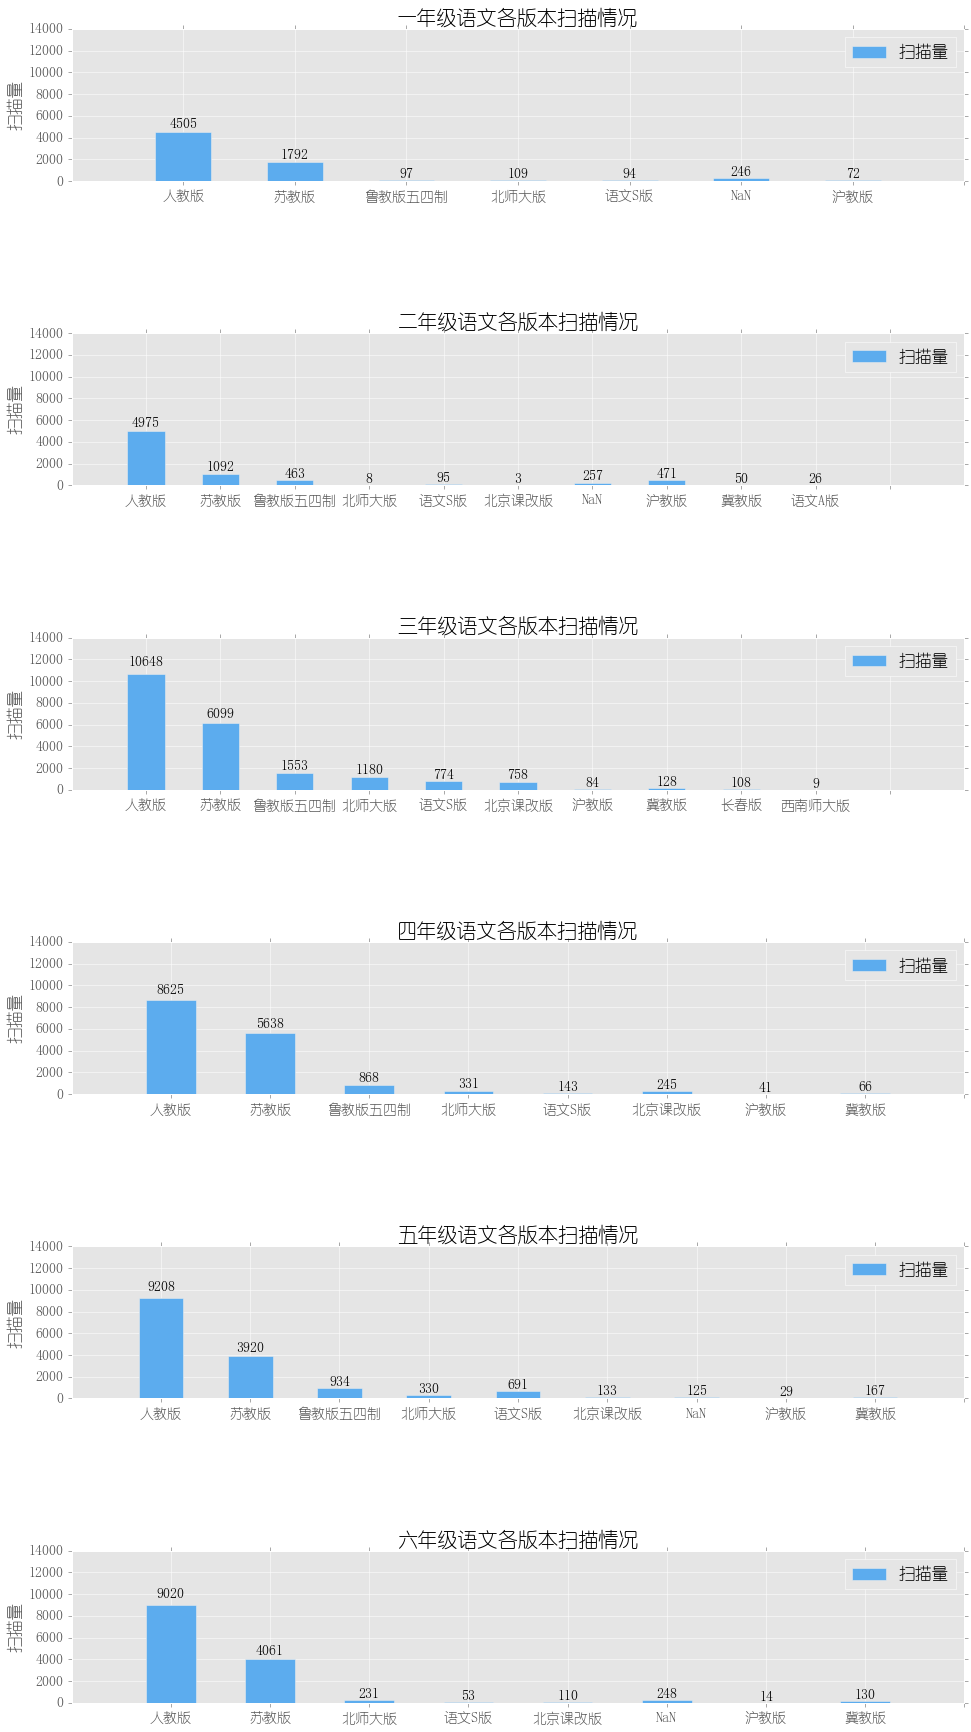

In [12]:
# 转换年级为汉字
grade_dict = {1: u"一", 2: u"二", 3: u"三", 4: u"四", 5: u"五", 6: u"六"}

# 使用ggplot的绘图风格
plt.style.use('ggplot')
#Microsoft YaHei,FangSong,YouYuan,SimHei,STKaiti,STSong
# 设置字体
plt.rc('font', family='YouYuan', size=14)
plt.figure(figsize=(16, 30))
for i, k in enumerate(data_list):
    # 对应的扫描次数大于0的版本才展示
    dl = list()
    edl = list()
    for g, d in enumerate(data_list[i]):
        if d > 0:
            dl.append(d)
            edl.append(unicode(ed_list2[g].replace("n", "N"), encoding="utf-8"))
    
    plt.subplot(610+i+1)
    rects = plt.bar(range(1,len(dl)+1), dl, width = 0.5, align="center", color='#5CACEE', label=u'扫描量')
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, '%d' % int(height), ha='center', va='bottom')
    plt.xticks([w for w in range(1, len(dl)+2)], edl)
    plt.yticks([w for w in range(0, 14001, 2000)], range(0, 14001, 2000))   
    plt.ylabel(u'扫描量')
    plt.title(u'%s年级语文各版本扫描情况' % grade_dict[(i+1)])
    plt.legend(rects, [u'扫描量'])

# 调整子图之间的间距
# left  = 0.125  # the left side of the subplots of the figure
# right = 0.1    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
wspace = 0.16   # the amount of width reserved for blank space between subplots
hspace = 1.0   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
plt.show()


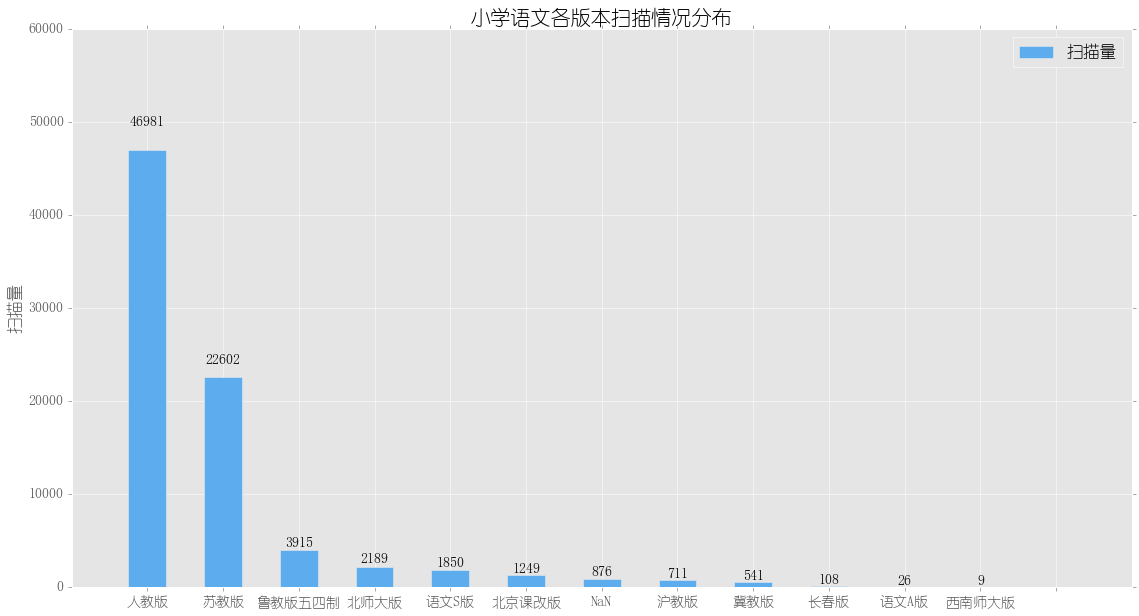

In [13]:
plt.figure(figsize=(19, 10))
edl = list()
for e in range(len(ed_list2)):
    # 对应的扫描次数大于0的版本才展示
    edl.append(unicode(ed_list2[e].replace("n", "N"), encoding="utf-8"))

rects = plt.bar(range(1,len(data_be)+1), data_be, width = 0.5, align="center", color='#5CACEE', label=u'扫描量')
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, '%d' % int(height), ha='center', va='bottom')
plt.xticks([w for w in range(1, len(data_be)+2)], edl)
plt.yticks([w for w in range(0, 60001, 10000)], range(0, 60001, 10000))
plt.ylabel(u'扫描量')
plt.title(u'小学语文各版本扫描情况分布')
plt.legend(rects, [u'扫描量'])

plt.show()



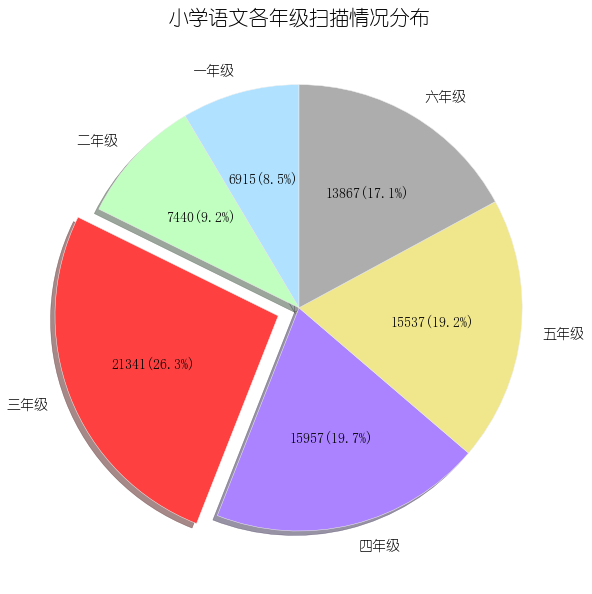

In [14]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}({p:3.1f}%)'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(19, 10))
labels = [u"一年级", u"二年级", u"三年级", u"四年级", u"五年级", u"六年级"]
explode = [0, 0, 0.1, 0, 0, 0]  # 0.1 凸出这部分
colors = ["#B0E2FF", "#C1FFC1", "#FF4040", "#AB82FF", "#F0E68C", "#ADADAD"]  # 指定颜色
plt.axes(aspect=1)  # set this , Figure is round, otherwise it is an ellipse
plt.pie(x=data_bg, labels=labels, explode=explode, autopct=make_autopct(data_bg),  # autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
          colors=colors, shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6)
plt.title(u'小学语文各年级扫描情况分布')
plt.show()

### 机型

In [15]:
xxyw_mc_scan = xxyw[[u"用户ID", u"扫描机型"]].groupby([u"扫描机型"]).count().rename(columns={u"用户ID": u"扫描次数"})
xxyw_mc_scan.sort_values(u"扫描次数", ascending=False)

,扫描次数
扫描机型,
Readboy_G90,54572
Readboy_G600,10329
Readboy_G60,7943
Readboy_G35S,2620
DSL C3,2021
Readboy_G300,1513
Readboy_G90S,720
Readboy_G500,491
Readboy_G100,236


In [16]:
other_mcs = pd.DataFrame([int(xxyw_mc_scan[xxyw_mc_scan[u'扫描次数'] < 1000].sum())], index={u"其他机型"}, columns=[u"扫描次数"]) 
mc1 = xxyw_mc_scan[xxyw_mc_scan[u'扫描次数'] > 1000].append(other_mcs)
mc1

,扫描次数
DSL C3,2021
Readboy_G300,1513
Readboy_G35S,2620
Readboy_G60,7943
Readboy_G600,10329
Readboy_G90,54572
其他机型,2059


In [17]:
mc2 = xxyw_mc_scan[xxyw_mc_scan[u'扫描次数'] < 1000]
mc2

,扫描次数
扫描机型,
C3,3
CLASSONE,1
CLASSONE_C2,5
CLASSONE_C3L,15
MI 5,4
MI NOTE LTE,1
ONE E1001,1
Readboy_G100,236
Readboy_G18,5


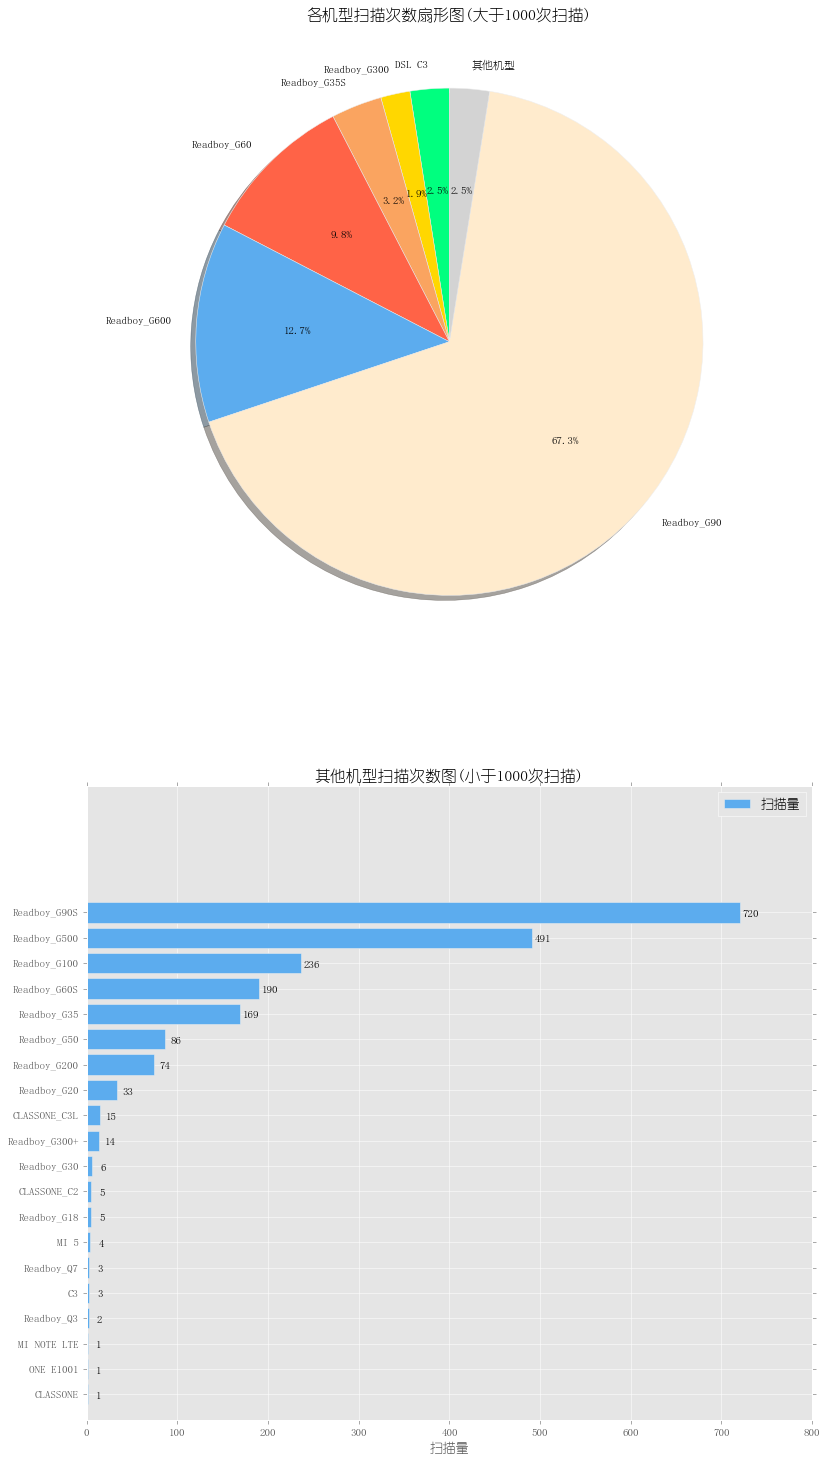

In [18]:
plt.rc('font', family='YouYuan', size=11)

plt.figure(figsize=(13, 25))

plt.subplot(211, aspect=1)

colors = ["springgreen", "gold", "sandybrown", "tomato", "#5CACEE", "blanchedalmond", "lightgrey",]

plt.pie(list(mc1.values), labels=list(mc1.index), autopct='%1.1f%%', shadow=True, colors=colors, 
           labeldistance=1.1, startangle = 90, pctdistance = 0.6)

plt.title(u"各机型扫描次数扇形图(大于1000次扫描)")

plt.subplot(212)

nmc2 = mc2.sort_values(by=u"扫描次数")

rects =  plt.barh(range(1,len(nmc2)+1), list(nmc2.values), align="center", color='#5CACEE', label=u'扫描量')

for k, rect in enumerate(rects):
    width = rect.get_width()
    plt.text(width+12, k+0.8, '%d' % int(width), ha='center', va='bottom')

plt.yticks(range(1,len(nmc2)+1), list(nmc2.index))

plt.legend(rects, [u'扫描量'])

plt.xlabel(u'扫描量')

plt.title(u"其他机型扫描次数图(小于1000次扫描)")

plt.show()

## 扫描时间

In [19]:
date_series = xxyw[u"扫描时间"].map(lambda x: x.split(" ")[0]).astype(datetime)
date_series.head()

0    2017-01-31
1    2017-01-31
2    2017-01-31
3    2017-01-31
4    2017-01-31
Name: 扫描时间, dtype: object

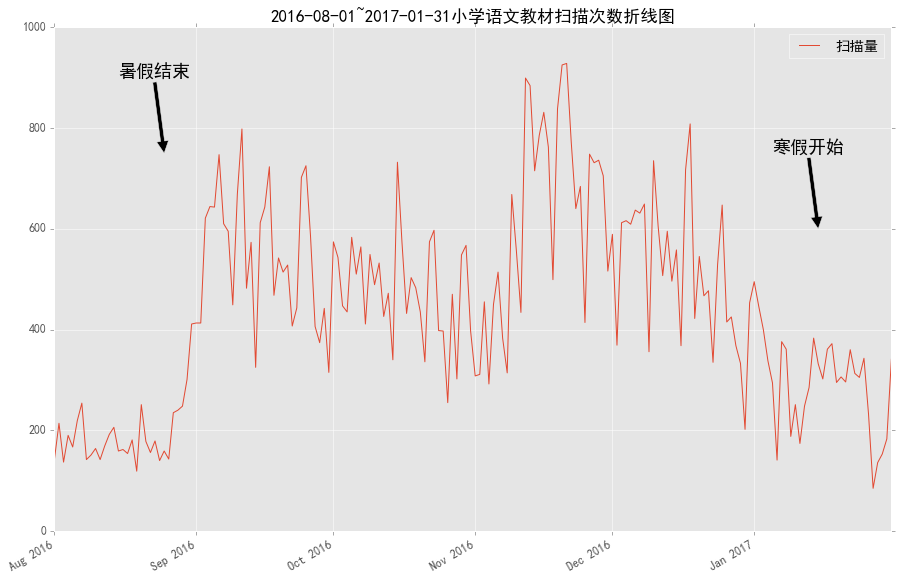

In [20]:
count_date = Counter(list(date_series))
# pd.Series 自带plot方法
ts = pd.Series(count_date.values(), index=pd.to_datetime(count_date.keys()))
plt.rc('font', family='SimHei', size=12)
fig, ax = plt.subplots()
ts.plot(ax=ax, figsize=(15,10), title=u"2016-08-01~2017-01-31小学语文教材扫描次数折线图");
ax.legend([u"扫描量"])
ax.annotate(u'暑假结束', xy=(datetime(2016, 8,25), 750), xytext=(datetime(2016, 8,15), 900),
            arrowprops=dict(facecolor='black', shrink=2.0), size=18)
ax.annotate(u'寒假开始', xy=(datetime(2017,1,15), 600), xytext=(datetime(2017,1,5), 750),
            arrowprops=dict(facecolor='black', shrink=1.2), size=18)